## 기본 데이터

[기본 데이터]
* 서울시 특정구 특정동의 생활인구 데이터
* data2017.csv
* data2018.csv
* data2019.csv
* data2020.csv
* data2021.csv
* data2022.csv


* 2017~2021년은 데이터 전부(train data), 2022년은 1~6월(test data)까지 제공
[변수 소개]
* index : 날짜

* 시간대 : 0 ~ 23 

* 총 생활 인구 수 : 생활 인구 합계

* 각 성별, 연령대 별 생활 인구수

---

# 1. Load Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df17 = pd.read_csv('data/data2017.csv', sep=',')

In [3]:
df17.shape

(8760, 31)

In [4]:
df18 = pd.read_csv('data/data2018.csv', sep=',')
df19 = pd.read_csv('data/data2019.csv', sep=',')
df20 = pd.read_csv('data/data2020.csv', sep=',')
df21 = pd.read_csv('data/data2021.csv', sep=',')

In [5]:
df_total = pd.concat([df17,df18,df19,df20,df21])

In [6]:
df_total.shape

(43512, 31)

In [7]:
df_test = pd.read_csv('data/data2022.csv', sep=',')
df_test = df_test[df_test['기준일ID'] < 20220301]

In [8]:
df_test.shape

(1416, 31)

In [9]:
df_total.head()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20170101,0,31535.2200,1945.4402,566.4588,631.5581,991.9184,1297.1287,1223.1529,1552.9448,...,1157.6661,1107.6781,1282.9235,1029.4360,998.0414,874.5643,1162.1547,1053.0477,964.3940,2025.4819
1,20170101,1,31188.9174,1930.4766,562.1018,625.2151,1030.6281,1307.7381,1183.0956,1491.5827,...,1120.0051,1102.5198,1271.8997,1027.2574,1038.7528,857.9100,1149.7532,1042.7411,919.0115,2062.2422
2,20170101,2,31240.4974,1921.1864,559.3965,658.7463,1058.7082,1311.9591,1186.2600,1537.3732,...,1103.1547,1112.4579,1282.9366,1027.8901,1020.0177,853.3890,1193.4472,1011.2073,889.9325,1960.1236
3,20170101,3,31442.4314,1946.4476,566.7525,649.0804,1057.9119,1324.2638,1202.1250,1521.2732,...,1116.2165,1102.0668,1260.8472,1007.6650,1042.9554,896.0038,1163.0355,1056.6428,891.9177,2060.1872
4,20170101,4,31922.7751,1953.7713,568.8845,623.2087,1063.2557,1342.9146,1209.2680,1556.0675,...,1187.5457,1120.2232,1281.2738,1064.0655,1045.2130,895.8336,1191.7017,1045.3362,874.4984,2038.6212


In [10]:
df_total.tail()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
8755,20211231,19,33060.4555,1858.2611,541.0746,605.9080,781.6602,1342.6763,1435.1080,1678.8904,...,1415.9734,1513.1706,1521.8562,1277.9546,1279.9036,977.2774,1091.7204,942.1525,789.2094,1705.8216
8756,20211231,20,32360.1898,2093.8808,609.6807,612.5326,768.8351,1323.7124,1479.1382,1654.5005,...,1311.7764,1431.5813,1461.8649,1294.2541,1232.4805,918.4935,1062.8069,894.8617,792.1748,1726.3071
8757,20211231,21,31417.3991,1983.6728,577.5909,639.2174,779.6693,1187.6783,1375.6785,1600.9946,...,1186.6502,1348.7581,1407.1924,1223.4195,1205.9346,908.4537,999.7321,874.9000,770.3955,1674.6047
8758,20211231,22,30763.0563,2028.3314,590.5941,654.0295,790.1638,1133.6311,1362.0266,1548.7366,...,1108.3915,1260.6435,1391.1649,1213.3359,1110.3310,863.0019,991.0451,848.4622,753.9750,1727.0258
8759,20211231,23,30404.2740,1903.8825,554.3582,615.0753,772.8499,1136.6157,1295.0434,1549.1984,...,993.5635,1166.8245,1428.1257,1239.5283,1186.8895,805.3827,986.6660,872.1547,734.2503,1759.0664


In [11]:
df_total.describe()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
count,4.351200e+04,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,...,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000
mean,2.019067e+07,11.500000,37390.662860,2148.116383,625.472466,780.302694,1281.098112,1527.965879,1651.545670,1954.198499,...,1584.695277,1564.601154,1674.193633,1350.005326,1270.863780,1096.356480,1240.731624,1097.079173,802.123901,1938.250009
std,1.419499e+04,6.922266,4310.755449,300.500034,87.497350,133.564721,254.313828,243.519957,258.969396,268.571940,...,253.507304,219.687578,191.108060,146.287736,142.600281,141.477103,161.394866,154.086172,103.382497,261.300489
min,2.017010e+07,0.000000,27011.574900,1256.222800,365.777800,433.762600,638.408000,944.904700,1032.076100,1292.426700,...,903.106700,909.570500,1025.843400,827.380300,810.559600,722.009600,826.469500,753.434700,548.978000,1344.929300
25%,2.018033e+07,5.750000,33875.737425,1949.556800,567.657250,697.131600,1098.306125,1356.053125,1468.659300,1742.718575,...,1393.425800,1403.251200,1550.552100,1249.948150,1164.192875,984.859725,1114.905925,974.305975,720.183200,1735.883625
50%,2.019063e+07,11.500000,36894.775800,2110.842250,614.619250,773.725200,1286.790300,1476.643200,1599.618550,1914.347450,...,1549.959850,1550.370200,1666.192100,1348.003400,1256.976300,1086.897250,1227.792900,1079.895150,779.591400,1868.377150
75%,2.020100e+07,17.250000,40337.888175,2319.439625,675.356925,847.501575,1459.179875,1666.844650,1801.818150,2131.280025,...,1758.015925,1709.051850,1803.789100,1450.721075,1365.977925,1198.444075,1358.140275,1211.505250,875.005500,2121.105125
max,2.021123e+07,23.000000,55160.667300,5732.894600,1669.261500,2552.666900,2254.272300,2602.287400,2889.718300,3113.842100,...,2559.704200,2493.349500,2322.021600,1910.637700,1878.388100,1893.407200,1879.534400,1790.028600,1222.817700,3199.837400


In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준일ID            43512 non-null  int64  
 1   시간대구분            43512 non-null  int64  
 2   총생활인구수           43512 non-null  float64
 3   남자0세부터9세생활인구수    43512 non-null  float64
 4   남자10세부터14세생활인구수  43512 non-null  float64
 5   남자15세부터19세생활인구수  43512 non-null  float64
 6   남자20세부터24세생활인구수  43512 non-null  float64
 7   남자25세부터29세생활인구수  43512 non-null  float64
 8   남자30세부터34세생활인구수  43512 non-null  float64
 9   남자35세부터39세생활인구수  43512 non-null  float64
 10  남자40세부터44세생활인구수  43512 non-null  float64
 11  남자45세부터49세생활인구수  43512 non-null  float64
 12  남자50세부터54세생활인구수  43512 non-null  float64
 13  남자55세부터59세생활인구수  43512 non-null  float64
 14  남자60세부터64세생활인구수  43512 non-null  float64
 15  남자65세부터69세생활인구수  43512 non-null  float64
 16  남자70세이상생활인구수     43512 non-null  float64
 17  여자0세부터9세생활인구수

In [13]:
df_test.head()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20220101,0,30509.7386,1884.2082,548.6298,635.1617,816.1686,1140.0136,1310.3109,1528.2100,...,1034.3335,1210.2650,1427.1433,1218.2473,1167.4485,823.9020,1032.1651,872.8850,767.0226,1737.1551
1,20220101,1,30759.5067,1918.5330,558.6242,665.6793,822.6910,1159.5614,1293.1350,1542.7586,...,1072.8086,1193.7476,1403.5719,1248.7765,1180.9186,838.5323,998.1091,862.3041,776.7908,1753.0597
2,20220101,2,31048.8787,2068.1943,602.2013,680.8294,819.7141,1164.5819,1331.9311,1537.8207,...,1090.9845,1208.3281,1410.2452,1268.6557,1197.7707,840.6799,1026.5402,882.2846,772.8478,1757.8801
3,20220101,3,31076.1092,1951.7702,568.3016,690.9847,804.2219,1180.7028,1336.8848,1542.4681,...,1104.3879,1224.9349,1414.4162,1275.0993,1207.1428,856.1711,1042.1205,891.6092,785.1560,1747.8953
4,20220101,4,31714.9309,2058.5797,599.4019,708.3313,847.9704,1168.0681,1355.7735,1586.0121,...,1152.1235,1269.6214,1442.1163,1296.6590,1206.5972,875.1503,1052.5656,877.6836,795.0789,1760.4713


In [14]:
df_test.tail()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
1411,20220228,19,32453.4947,1841.4027,536.1659,575.8559,842.9216,1250.5645,1426.3220,1697.1138,...,1263.9409,1434.5048,1549.8768,1302.9269,1342.7708,987.5098,1083.5371,921.1222,749.7635,1624.4443
1412,20220228,20,32073.9265,1931.0302,562.2630,662.6906,803.2046,1243.0990,1385.1267,1663.8920,...,1223.4823,1433.1730,1496.6608,1304.8500,1304.3518,925.1131,1020.2441,935.3880,752.8180,1642.4108
1413,20220228,21,31374.2576,1993.1022,580.3368,621.4668,721.9948,1143.6955,1386.2419,1648.1777,...,1058.9075,1357.8462,1504.7994,1257.1625,1264.3213,916.4612,1025.3133,872.5654,733.6516,1646.6095
1414,20220228,22,31127.4353,1919.8658,559.0122,633.7849,733.4798,1164.5158,1399.0660,1584.3372,...,1057.2851,1397.4696,1525.6007,1302.0420,1201.8349,888.6007,1037.7681,868.9063,738.1935,1681.1236
1415,20220228,23,31550.2525,2126.9982,619.3234,695.3075,749.0628,1237.4903,1382.7286,1609.0299,...,1077.7119,1267.5702,1459.1970,1262.2038,1247.9505,896.7409,1025.0123,842.0208,728.6185,1752.8037


In [15]:
df_test.describe()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
count,1.416000e+03,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,...,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,2.022016e+07,11.500000,35049.086576,2221.575267,646.861681,733.873643,916.570627,1287.343488,1553.552699,1795.220318,...,1347.099455,1475.979167,1664.559422,1385.093461,1324.975314,1005.602366,1120.790898,927.666035,747.612511,1790.705453
std,4.994049e+01,6.924632,2673.898934,188.037576,54.751377,85.634413,118.598082,98.783779,179.830711,172.915685,...,175.759525,168.630425,146.502829,124.776446,95.017962,90.276154,93.398649,60.850509,33.183704,68.514151
min,2.022010e+07,0.000000,28168.691000,1620.734700,471.913500,511.290900,651.114700,913.591700,1158.486600,1399.756700,...,834.310500,1072.934500,1219.019300,1085.992600,1010.743200,773.353300,910.309000,789.383100,608.740600,1594.091500
25%,2.022012e+07,5.750000,32645.819600,2094.086375,609.740325,673.911775,821.701175,1213.694175,1406.243700,1661.910325,...,1181.060475,1330.124300,1552.920175,1282.083125,1252.079125,925.127050,1038.538625,878.622925,727.204375,1742.845550
50%,2.022013e+07,11.500000,34955.472500,2219.375400,646.221150,720.315650,898.017450,1290.124150,1506.673100,1752.922100,...,1363.701350,1460.569850,1646.969000,1372.223100,1322.758500,1013.188500,1115.910300,923.712200,747.573650,1793.332250
75%,2.022021e+07,17.250000,37360.157100,2332.484975,679.155725,787.399700,1006.365925,1359.195000,1704.644350,1947.317100,...,1495.068225,1624.244800,1774.937800,1477.027700,1398.892300,1076.808925,1196.233550,975.230850,768.144300,1838.006875
max,2.022023e+07,23.000000,41397.561200,2982.436300,868.403400,1068.681800,1299.866500,1585.819200,2026.253000,2258.751100,...,1837.639800,1889.078300,2117.135800,1799.391500,1592.462500,1263.653500,1385.035200,1110.089700,881.343000,2018.513000


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준일ID            1416 non-null   int64  
 1   시간대구분            1416 non-null   int64  
 2   총생활인구수           1416 non-null   float64
 3   남자0세부터9세생활인구수    1416 non-null   float64
 4   남자10세부터14세생활인구수  1416 non-null   float64
 5   남자15세부터19세생활인구수  1416 non-null   float64
 6   남자20세부터24세생활인구수  1416 non-null   float64
 7   남자25세부터29세생활인구수  1416 non-null   float64
 8   남자30세부터34세생활인구수  1416 non-null   float64
 9   남자35세부터39세생활인구수  1416 non-null   float64
 10  남자40세부터44세생활인구수  1416 non-null   float64
 11  남자45세부터49세생활인구수  1416 non-null   float64
 12  남자50세부터54세생활인구수  1416 non-null   float64
 13  남자55세부터59세생활인구수  1416 non-null   float64
 14  남자60세부터64세생활인구수  1416 non-null   float64
 15  남자65세부터69세생활인구수  1416 non-null   float64
 16  남자70세이상생활인구수     1416 non-null   float64
 17  여자0세부터9세생활인구수 

---

# EDA
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

In [17]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [18]:
df_total.reset_index(inplace=True)
df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'], format='%Y%m%d')

df_test.reset_index(inplace=True)
df_test['기준일ID'] = pd.to_datetime(df_test['기준일ID'], format='%Y%m%d')


In [19]:
df_total.head()

,index,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,0,2017-01-01,0,31535.2200,1945.4402,566.4588,631.5581,991.9184,1297.1287,1223.1529,...,1157.6661,1107.6781,1282.9235,1029.4360,998.0414,874.5643,1162.1547,1053.0477,964.3940,2025.4819
1,1,2017-01-01,1,31188.9174,1930.4766,562.1018,625.2151,1030.6281,1307.7381,1183.0956,...,1120.0051,1102.5198,1271.8997,1027.2574,1038.7528,857.9100,1149.7532,1042.7411,919.0115,2062.2422
2,2,2017-01-01,2,31240.4974,1921.1864,559.3965,658.7463,1058.7082,1311.9591,1186.2600,...,1103.1547,1112.4579,1282.9366,1027.8901,1020.0177,853.3890,1193.4472,1011.2073,889.9325,1960.1236
3,3,2017-01-01,3,31442.4314,1946.4476,566.7525,649.0804,1057.9119,1324.2638,1202.1250,...,1116.2165,1102.0668,1260.8472,1007.6650,1042.9554,896.0038,1163.0355,1056.6428,891.9177,2060.1872
4,4,2017-01-01,4,31922.7751,1953.7713,568.8845,623.2087,1063.2557,1342.9146,1209.2680,...,1187.5457,1120.2232,1281.2738,1064.0655,1045.2130,895.8336,1191.7017,1045.3362,874.4984,2038.6212


In [20]:
df_test.head()

,index,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,0,2022-01-01,0,30509.7386,1884.2082,548.6298,635.1617,816.1686,1140.0136,1310.3109,...,1034.3335,1210.2650,1427.1433,1218.2473,1167.4485,823.9020,1032.1651,872.8850,767.0226,1737.1551
1,1,2022-01-01,1,30759.5067,1918.5330,558.6242,665.6793,822.6910,1159.5614,1293.1350,...,1072.8086,1193.7476,1403.5719,1248.7765,1180.9186,838.5323,998.1091,862.3041,776.7908,1753.0597
2,2,2022-01-01,2,31048.8787,2068.1943,602.2013,680.8294,819.7141,1164.5819,1331.9311,...,1090.9845,1208.3281,1410.2452,1268.6557,1197.7707,840.6799,1026.5402,882.2846,772.8478,1757.8801
3,3,2022-01-01,3,31076.1092,1951.7702,568.3016,690.9847,804.2219,1180.7028,1336.8848,...,1104.3879,1224.9349,1414.4162,1275.0993,1207.1428,856.1711,1042.1205,891.6092,785.1560,1747.8953
4,4,2022-01-01,4,31714.9309,2058.5797,599.4019,708.3313,847.9704,1168.0681,1355.7735,...,1152.1235,1269.6214,1442.1163,1296.6590,1206.5972,875.1503,1052.5656,877.6836,795.0789,1760.4713


<AxesSubplot:xlabel='기준일ID', ylabel='총생활인구수'>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/home/user/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.8/site-packages/IPy

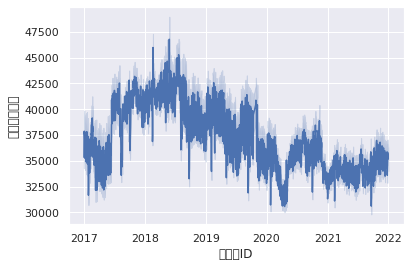

In [21]:
sns.lineplot(data=df_total, x='기준일ID', y='총생활인구수')

In [22]:
df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day
df_total['weekday'] = df_total['기준일ID'].dt.dayofweek

In [23]:
df_test['year'] = df_test['기준일ID'].dt.year
df_test['month'] = df_test['기준일ID'].dt.month
df_test['day'] = df_test['기준일ID'].dt.day
df_test['weekday'] = df_test['기준일ID'].dt.dayofweek

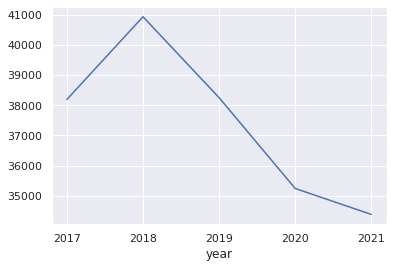

In [24]:
ax = df_total.groupby('year')['총생활인구수'].mean().plot()
ax.set_xticks([2017,2018,2019,2020,2021])
plt.show()

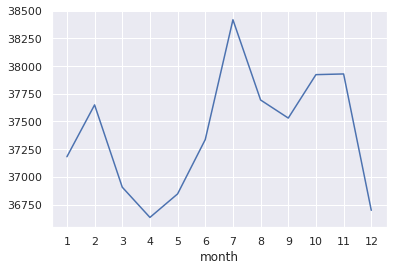

In [25]:
ax = df_total.groupby('month')['총생활인구수'].mean().plot()
ax.set_xticks(range(1,13))
plt.show()

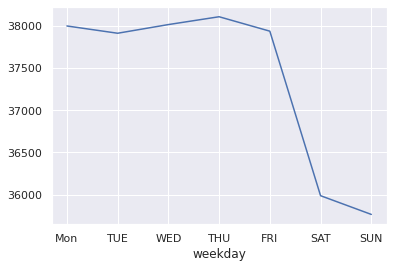

In [26]:
ax = df_total.groupby('weekday')['총생활인구수'].mean().plot()
plt.xticks(range(0,7), labels=['Mon','TUE', 'WED','THU', 'FRI', 'SAT', 'SUN'])
plt.show()

In [31]:
df_total.corr()

,index,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,year,month,day,weekday
index,1.000000,2.753717e-03,0.037279,0.062571,0.062571,-0.044763,-0.100228,-0.002928,0.061456,0.039031,...,0.109363,0.010941,0.010502,-0.054759,-0.039447,-0.013508,6.834083e-04,9.962326e-01,9.003805e-02,1.103382e-03
시간대구분,0.002754,1.000000e+00,-0.017742,-0.135804,-0.135804,-0.188470,-0.000504,0.073756,0.038979,-0.066396,...,0.011604,0.087100,0.021044,-0.025746,-0.047315,-0.058327,-4.082686e-15,-1.200105e-16,-3.473106e-17,-8.006236e-18
총생활인구수,0.037279,-1.774223e-02,1.000000,0.663445,0.663445,0.449533,0.597765,0.864428,0.861651,0.909338,...,0.881142,0.879289,0.822712,0.714894,0.633657,0.616957,-4.383380e-01,3.451310e-02,2.731488e-02,-1.759828e-01
남자0세부터9세생활인구수,0.062571,-1.358040e-01,0.663445,1.000000,1.000000,0.369768,0.214835,0.376991,0.435625,0.496772,...,0.573751,0.544543,0.510362,0.485729,0.466147,0.509582,-2.270983e-01,5.922014e-02,2.325557e-02,-6.333082e-02
남자10세부터14세생활인구수,0.062571,-1.358040e-01,0.663445,1.000000,1.000000,0.369768,0.214835,0.376991,0.435625,0.496772,...,0.573751,0.544543,0.510362,0.485729,0.466147,0.509582,-2.270983e-01,5.922015e-02,2.325556e-02,-6.333081e-02
남자15세부터19세생활인구수,-0.044763,-1.884704e-01,0.449533,0.369768,0.369768,1.000000,0.497610,0.385732,0.304593,0.342786,...,0.344735,0.347117,0.298439,0.267008,0.208801,0.234283,-1.419180e-01,-4.472046e-02,3.587424e-03,-2.638603e-02
남자20세부터24세생활인구수,-0.100228,-5.039591e-04,0.597765,0.214835,0.214835,0.497610,1.000000,0.725036,0.477050,0.562151,...,0.403545,0.489745,0.462555,0.392697,0.227649,0.224006,-3.342716e-01,-9.585790e-02,-1.672919e-03,-1.351847e-01
남자25세부터29세생활인구수,-0.002928,7.375589e-02,0.864428,0.376991,0.376991,0.385732,0.725036,1.000000,0.871100,0.866705,...,0.728028,0.709889,0.621690,0.485959,0.384494,0.322933,-2.997364e-01,-3.353149e-03,1.821719e-02,-2.189692e-01
남자30세부터34세생활인구수,0.061456,3.897874e-02,0.861651,0.435625,0.435625,0.304593,0.477050,0.871100,1.000000,0.889168,...,0.773820,0.710873,0.560303,0.399086,0.352070,0.298807,-1.495678e-01,5.890513e-02,2.357084e-02,-2.234352e-01
남자35세부터39세생활인구수,0.039031,-6.639566e-02,0.909338,0.496772,0.496772,0.342786,0.562151,0.866705,0.889168,1.000000,...,0.784211,0.735279,0.672859,0.561258,0.471457,0.424558,-3.089403e-01,3.640065e-02,3.165821e-02,-2.477040e-01


In [27]:
# 1. 20, 21년도의 생활총인구수는 감소한다 (코로나 때문으로 예상)
# 2. 월 데이터에서는 특별한 의미를 찾을 수 없었다
# 3. 요일별 데이터를 비교해보았을 때 주말의 생활 총 인구수가 더 적었다

In [28]:
# CSV로 저장
df_total.to_csv('df_total.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

## 시계열 분석 (Stationary / Normality)

* 정상성을 띈다 = 시계열 데이터의 평균과 분산이 일정하다.
    - Dickey Fuller test 를 활용
    - Stationary (p-value < 0.05)

---
        
* 귀무가설 : H0 : 시계열 데이터에 unit root를 포함한다 : nonstatinary / 정상 시계열이 아니다.
* 대립가설 : H1 : 시계열 데이터에 unit root를 포함하지 않는다 : 정상 시계열이다. 
---

In [29]:
from statsmodels.tsa.stattools import adfuller

def adf_test(y):
    dftest = adfuller(y, autolag='AIC')
    # autolag 'AIC' : 검정 AR 모형의 차수를 자동으로 결정
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [30]:
adf_test(df_total['총생활인구수'])

test statistic         -8.946524e+00
p-value                 8.957713e-15
# of lags               5.500000e+01
# of observations       4.345600e+04
Critical Value (1%)    -3.430500e+00
Critical Value (5%)    -2.861607e+00
Critical Value (10%)   -2.566805e+00
dtype: float64


In [31]:
# test statistic 검정 통계량 - 회귀 분석의 결과로 나타나는 계수
# p-value : p-value 추정치
# # of lags : 사용된 시차의 수(used lags)
# # of observations : 분석에 사용된 자료의 수

# critical values : 1%, 5%, 10%수준에 해당되는 검정 통계량의 값

## 정규성 분석
* df_total['총생활인구수'] 데이터가 정규성을 띄는지 확인

* 정규성을 띈다 = 데이터의 분포가 정규분포를 이룬다. 
    * Shapiro test 를 활용합니다
    * Normality (p-value > 0.05)

---
* 귀무가설 : H0 : 시계열 데이터가 정규성을 충족한다.
* 대립가설 : H1 : 시계열 데이터가 정규성을 충족하지 않는다.
---

In [32]:
from scipy import stats
from scipy.stats import shapiro
shapiro_test = stats.shapiro(df_total['총생활인구수'])
shapiro_test

c:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9755643606185913, pvalue=0.0)

In [33]:
# shapiro test의 특징 : 데이터 수가 5000을 초과 하는 경우, 
#                      정규성 검정에 대한 p-value를 담보하지 못한다.(통계적 유의성이 떨어진다.)

# 시계열 데이터가 정규성을 충족하지 않는다.

In [34]:
from scipy.stats import anderson
anderson(df_total['총생활인구수'])

AndersonResult(statistic=295.90222305037605, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))